# Introduction to the IPython / Jupyter Notebook

Cells can run some code:

In [1]:
print("Hello world!")

Hello world!


Including multiple lines of code:

In [2]:
a = 5
b = 6
print(a / b)

0.8333333333333334


In [4]:
print(c)

The order of the cells doesn't really matter.


In [3]:
c = "The order of the cells doesn't really matter."

In [5]:
print?

# Markdown cells can have headlines

## And sub headlines

##### And even lower levels

Also, you can *italicize* and **bold** text.

You can have links, [which look like this](http://www.google.com)

And even $\LaTeX$:

$$
\phi(x) = \frac{a}{x^b}
$$

Cell magics use '%%'

In [6]:
%%timeit
a = 1
for i in range(10**7):
    a += i
print(a)

49999995000001
49999995000001
49999995000001
49999995000001
1 loops, best of 3: 934 ms per loop


## Graphics

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

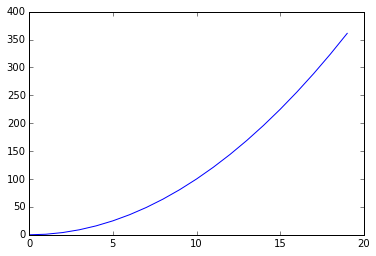

In [9]:
x_vals = range(20)
y_vals = [x**2 for x in x_vals]
plt.plot(x_vals, y_vals)

In [10]:
import numpy as np

In [11]:
y = np.random.randn(1000)
y = y.cumsum()

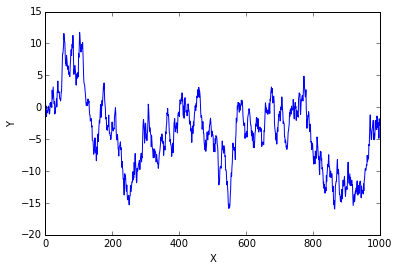

In [12]:
plt.plot(y)
plt.ylabel("Y")
plt.xlabel("X")

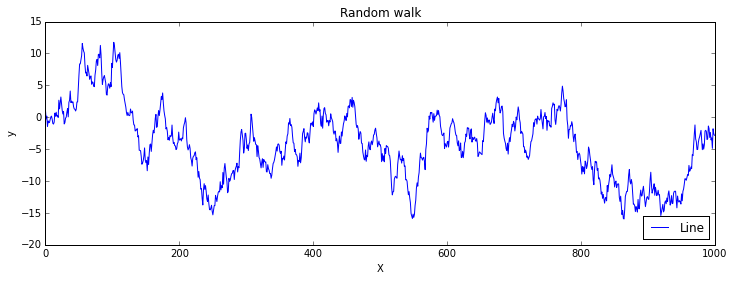

In [13]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)

line = ax.plot(y)

ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Random walk")

ax.legend(line, ["Line"], loc="lower right")

In [14]:
x = np.random.random(100)
y = np.random.randint(-100, 100, 100)

(array([  8.,  14.,   6.,  10.,  10.,   4.,  18.,   9.,   9.,  12.]),
 array([ 0.0298832 ,  0.12646816,  0.22305312,  0.31963808,  0.41622304,
         0.512808  ,  0.60939296,  0.70597791,  0.80256287,  0.89914783,
         0.99573279]),
 <a list of 10 Patch objects>)

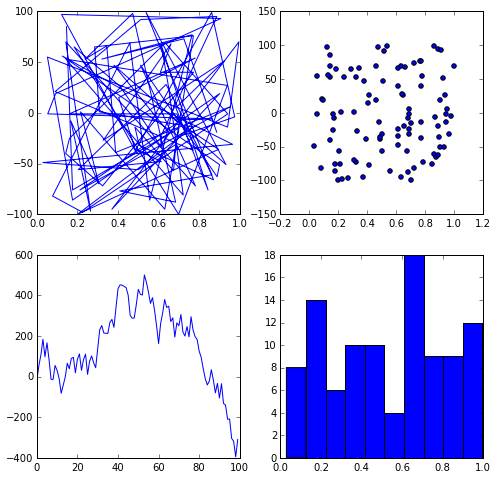

In [15]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(x, y)
ax2.scatter(x, y)
ax3.plot(y.cumsum())
ax4.hist(x)


----



# pandas

https://www.ssa.gov/oact/babynames/limits.html

In [16]:
import pandas as pd

In [17]:
names14 = pd.read_csv("names/yob2014.txt")

In [18]:
names14.head()

,Emma,F,20799
0,Olivia,F,19674
1,Sophia,F,18490
2,Isabella,F,16950
3,Ava,F,15586
4,Mia,F,13442


In [19]:
names = pd.read_csv("names/yob2014.txt", names=["Name", "Sex", "Count"])

In [20]:
names.head()

,Name,Sex,Count
0,Emma,F,20799
1,Olivia,F,19674
2,Sophia,F,18490
3,Isabella,F,16950
4,Ava,F,15586


In [21]:
names.dtypes

Name     object
Sex      object
Count     int64
dtype: object

In [22]:
names[names.Sex=="M"].head(20)

,Name,Sex,Count
19067,Noah,M,19144
19068,Liam,M,18342
19069,Mason,M,17092
19070,Jacob,M,16712
19071,William,M,16687
19072,Ethan,M,15619
19073,Michael,M,15323
19074,Alexander,M,15293
19075,James,M,14301
19076,Daniel,M,13829


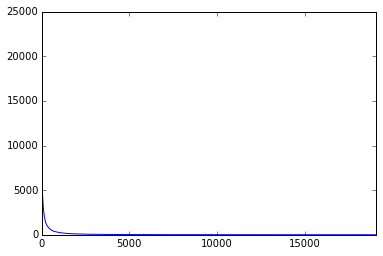

In [23]:
names[names.Sex=="F"].Count.plot()

In [24]:
names["Year"] = 2014

In [25]:
names.head()

,Name,Sex,Count,Year
0,Emma,F,20799,2014
1,Olivia,F,19674,2014
2,Sophia,F,18490,2014
3,Isabella,F,16950,2014
4,Ava,F,15586,2014


In [26]:
for year in range(1880, 2014):
    file_name = "names/yob" + str(year) + ".txt"
    df = pd.read_csv(file_name, names=["Name", "Sex", "Count"])
    df["Year"] = year
    names = names.append(df)

In [27]:
names[names.Year==1900].head()

,Name,Sex,Count,Year
0,Mary,F,16707,1900
1,Helen,F,6343,1900
2,Anna,F,6114,1900
3,Margaret,F,5306,1900
4,Ruth,F,4765,1900


In [28]:
hillaries = names[(names.Name=="Hillary") & (names.Sex=="F")]

In [29]:
hillaries.set_index("Year", inplace=True)

In [30]:
hillaries.sort_index(inplace=True)

/Users/dmasad/.virtualenvs/data-course/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


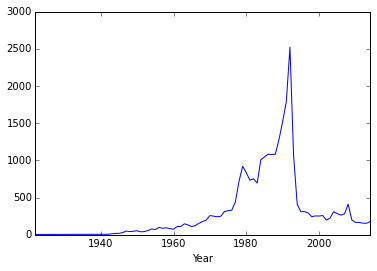

In [31]:
hillaries.Count.plot()

In [32]:
hillaries[(hillaries.index>1990)]

,Name,Sex,Count
Year,,,
1991,Hillary,F,1789
1992,Hillary,F,2521
1993,Hillary,F,1064
1994,Hillary,F,408
1995,Hillary,F,310
1996,Hillary,F,312
1997,Hillary,F,294
1998,Hillary,F,243
1999,Hillary,F,254


In [33]:
ashlies = names[names.Name=="Ashley"].copy()

In [34]:
ashlies = ashlies.pivot("Year", "Sex", "Count")

In [35]:
ashlies.head()

Sex,F,M
Year,,
1880,NaN,8
1881,NaN,6
1882,NaN,7
1883,NaN,9
1884,NaN,6


In [ ]:
ashlies.fillna(0, inplace=True)

In [ ]:
ashlies.plot()

In [ ]:
end_year = 1982
ashlies[ashlies.index < end_year]["F"].plot(color="red", lw=2)
ashlies[ashlies.index < end_year]["M"].plot(color="blue", lw=2)
plt.legend(loc=(1.02, 0))

In [ ]:
start_year=1950
end_year = 1990

fig, ax = plt.subplots(figsize=(8, 4))

ashlies[ashlies.index.isin(range(start_year, end_year))]["F"].plot(color="red", lw=2, ax=ax)
ashlies[ashlies.index.isin(range(start_year, end_year))]["M"].plot(color="blue", lw=2, ax=ax)
ax.legend(loc=(1.02, 0))
ax.set_yscale('log')

In [ ]:
total_names = names.groupby(["Name", "Sex"]).aggregate(sum)

In [ ]:
total_names.head()

In [ ]:
total_names.xs("M", level="Sex").head()

In [ ]:
total_names = total_names[["Count"]]

In [ ]:
total_names.head()

In [ ]:
total_names.reset_index(inplace=True)

In [ ]:
total_names.head()

In [ ]:
male_names = total_names[total_names.Sex=="M"].copy()

In [ ]:
male_names.sort("Count", ascending=False, inplace=True)

In [ ]:
male_names.head(10)

In [ ]:
male_names.index = range(1, len(male_names)+1)

In [ ]:
male_names

In [ ]:
female_names = total_names[total_names.Sex=="F"].copy()

In [ ]:
unisex_names = pd.merge(male_names, female_names, on="Name", suffixes=("_M", "_F"))

In [ ]:
unisex_names.head()

In [ ]:
unisex_names = unisex_names[["Name", "Count_M", "Count_F"]]

In [ ]:
unisex_names["Ratio"] = unisex_names.Count_M / (unisex_names.Count_M + unisex_names.Count_F)

In [ ]:
unisex_names["Ratio"][unisex_names.Ratio>0.5] = 1 - unisex_names["Ratio"][unisex_names.Ratio>0.5] 

In [ ]:
unisex_names[unisex_names.Ratio==0.5]

In [ ]:
unisex_names[(unisex_names.Ratio > 0.49) & (unisex_names.Ratio < 0.51)]